This week we will talk about the [Jenks Natural Breaks](https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization), it is mostly useful for determine the map ranges. It finds the best way to split the data into ranges, for example, if we have 50 countries, 15 countries with 0 - 3 values, 20 countries with values from 5 - 10, and 15 countris with 15 - 20. Therefore, if we want to plot them on a map with different colors, the best way we are splitting the data is 0-3, 3-10, and 10-20. The Jenks Natural Breaks is an algorithm that will figure this out by grouping the similar values into a group. Let's see the example below. I am using an existing package - [jenkspy](https://github.com/mthh/jenkspy), to calculate the breaks.    

In [135]:
import jenkspy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

%matplotlib inline

In [136]:
# Let's generate this 3 classes data
data = np.concatenate([np.random.randint(low = 0, high = 4, size = 15), \
               np.random.randint(5, 11, 20), np.random.randint(15, 21, 15)])

In [137]:
# Let's calculate the breaks
breaks = jenkspy.jenks_breaks(data, nb_class=3)
breaks

[0.0, 3.0, 10.0, 20.0]

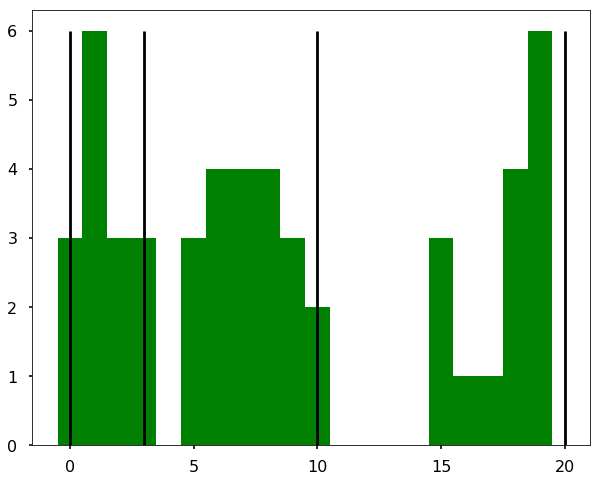

In [138]:
plt.figure(figsize = (10,8))
hist = plt.hist(data, bins=20, align='left', color='g')
for b in breaks:
    plt.vlines(b, ymin=0, ymax = max(hist[0]))

We could see the above figure that the breaks (black lines) are exact what we expect! 

## How it works?

The method is an iterative process to repeatly test different breaks in the dataset to determine which set of breaks has the smallest in-class variance. You can see the above figure that within each group/class, the variance is smallest. But note that if only minimize the in-class variance, if we maximize the out-class variance (that is variance between different groups), the breaks will fall into the middle of the gaps above figure (in this case, it will be 4.5, 12.5, but I didn't try). 

## Another example

Let's have fun and see what the breaks for a normal distribution. (I didn't find the connection to 3 sigmas as I thought!).  

In [147]:
np.random.seed(1)
normal = np.random.normal(loc=0.0, scale=1.0, size=500)

In [154]:
breaks = jenkspy.jenks_breaks(normal, nb_class=5)
breaks

[-2.79308500014654,
 -1.3057269225577375,
 -0.39675352685597737,
 0.386539145133091,
 1.2932258825322618,
 3.0308571123720305]

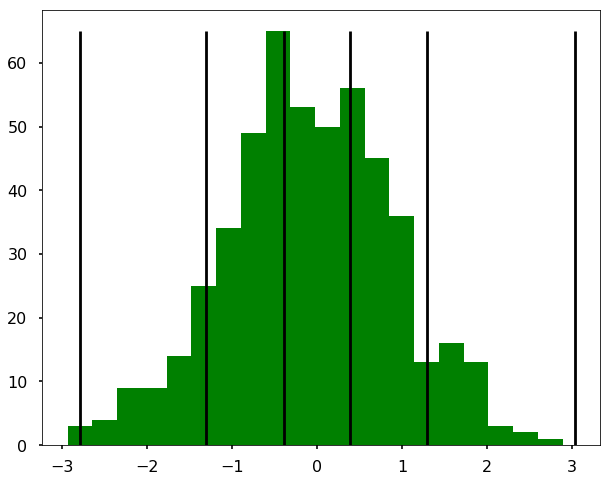

In [155]:
plt.figure(figsize = (10,8))
hist = plt.hist(normal, bins=20, align='left', color='g')
for b in breaks:
    plt.vlines(b, ymin=0, ymax = max(hist[0]))

## References

[What is the Jenks Natural Breaks?](https://www.ehdp.com/vitalnet/breaks-1.htm)    
[Jenks natural breaks optimization - Wikipedia](https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization)